In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train=pd.read_csv('train_v9rqX0R.csv')

In [54]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
train['Outlet_Size'].fillna('U',inplace=True)

In [58]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [59]:
numerical_features=[feature for feature in train.columns if train[feature].dtype!='O']

In [60]:
numerical_features.remove('Outlet_Establishment_Year')

In [61]:
cateogorical_features=[feature for feature in train.columns if train[feature].dtype=='O' and feature not in ['Item_Identifier']]

In [62]:
cateogorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [63]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [64]:
train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)

In [65]:
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [66]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [67]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [68]:
train['Years active']=2013-train['Outlet_Establishment_Year']

In [69]:
train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [70]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years active
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,U,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


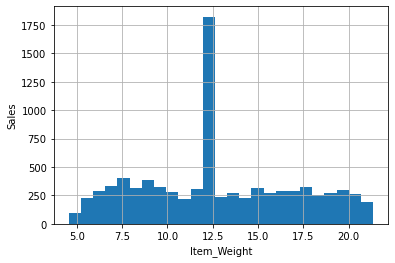

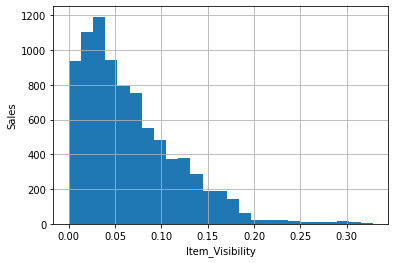

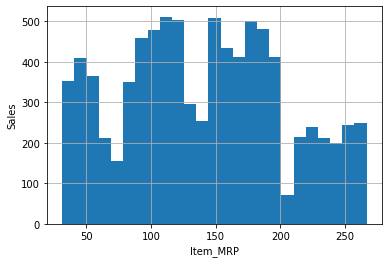

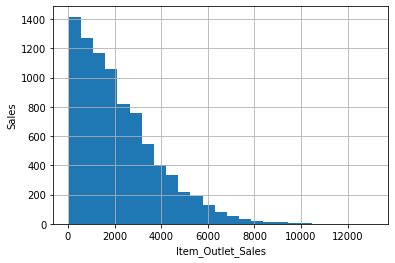

In [71]:
for feature in numerical_features:
  train1=train.copy()
  train1[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.show()



In [72]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

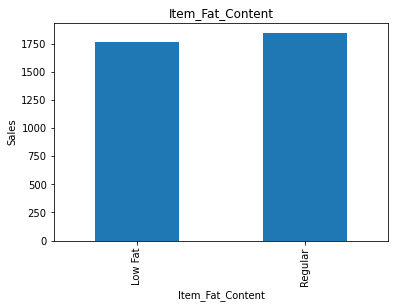

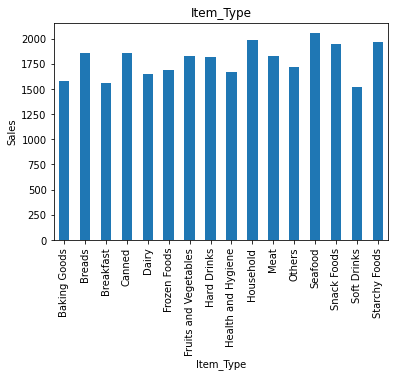

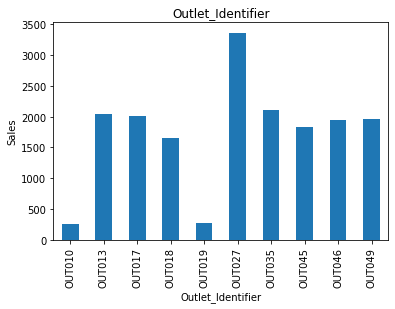

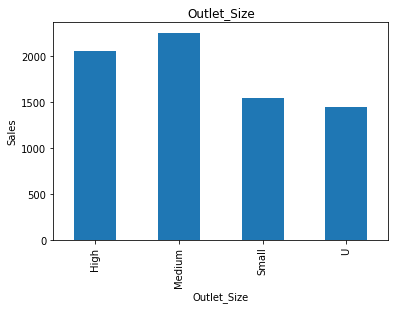

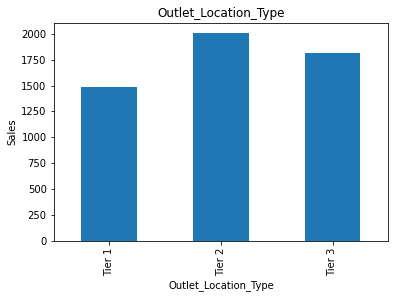

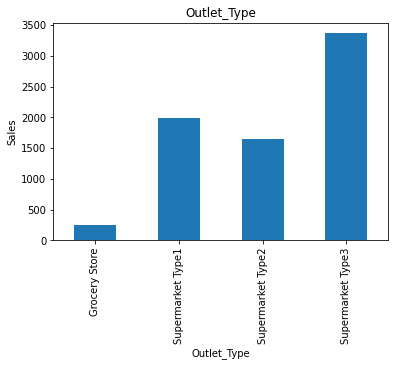

In [73]:
for feature in cateogorical_features:
  train2=train.copy()
  train2.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.title(feature)
  plt.show()

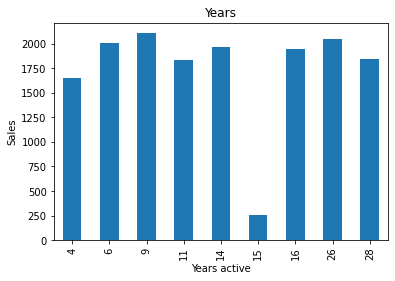

In [74]:
train2.groupby(train['Years active'])['Item_Outlet_Sales'].median().plot.bar()
plt.xlabel('Years active')
plt.ylabel('Sales')
plt.title('Years')
plt.show()

In [75]:
med=train['Item_Visibility'].median()
train['Item_Visibility'].replace(0,med,inplace=True)

In [76]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years active,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,U,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [78]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [79]:
train.drop(['Item_Type'],axis=1,inplace=True)

In [80]:
train['Outlet_No']=train['Outlet_Identifier'].str[3:]

In [81]:
train['Outlet_No']

0       049
1       018
2       049
3       010
4       013
       ... 
8518    013
8519    045
8520    035
8521    018
8522    046
Name: Outlet_No, Length: 8523, dtype: object

In [82]:
train.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [83]:
Outlet_size=pd.get_dummies(train['Outlet_Size'],drop_first=True)
Outlet_location=pd.get_dummies(train['Outlet_Location_Type'],drop_first=True)
Outlet_Type=pd.get_dummies(train['Outlet_Type'],drop_first=True)
Item_Fat_Content=pd.get_dummies(train['Item_Fat_Content'],drop_first=True)


In [84]:
train.drop(['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'],axis=1,inplace=True)

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years active,Item_Type_Combined,Outlet_No
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,Food,049
1,DRC01,5.92,0.019278,48.2692,443.4228,4,Drinks,018
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,Food,049
3,FDX07,19.20,0.053931,182.0950,732.3800,15,Food,010
4,NCD19,8.93,0.053931,53.8614,994.7052,26,Non-Consumable,013


In [86]:
train=pd.concat([train,Outlet_size,Outlet_location,Outlet_Type,Item_Fat_Content],axis=1)

In [87]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years active,Item_Type_Combined,Outlet_No,Medium,Small,U,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Non-Edible,Regular
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,Food,049,1,0,0,0,0,1,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,4,Drinks,018,1,0,0,0,1,0,1,0,0,1
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,Food,049,1,0,0,0,0,1,0,0,0,0
3,FDX07,19.20,0.053931,182.0950,732.3800,15,Food,010,0,0,1,0,1,0,0,0,0,1
4,NCD19,8.93,0.053931,53.8614,994.7052,26,Non-Consumable,013,0,0,0,0,1,1,0,0,1,0


In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [89]:
train['Item_Type_Combined']=le.fit_transform(train.Item_Type_Combined)

In [90]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years active,Item_Type_Combined,Outlet_No,Medium,Small,U,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Non-Edible,Regular
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,1,049,1,0,0,0,0,1,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,4,0,018,1,0,0,0,1,0,1,0,0,1
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,1,049,1,0,0,0,0,1,0,0,0,0
3,FDX07,19.20,0.053931,182.0950,732.3800,15,1,010,0,0,1,0,1,0,0,0,0,1
4,NCD19,8.93,0.053931,53.8614,994.7052,26,2,013,0,0,0,0,1,1,0,0,1,0


In [91]:
train['Item_Outlet_Sales'].replace(0,train['Item_Outlet_Sales'].median())

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [92]:
train.dtypes

Item_Identifier        object
Item_Weight           float64
Item_Visibility       float64
Item_MRP              float64
Item_Outlet_Sales     float64
Years active            int64
Item_Type_Combined      int64
Outlet_No              object
Medium                  uint8
Small                   uint8
U                       uint8
Tier 2                  uint8
Tier 3                  uint8
Supermarket Type1       uint8
Supermarket Type2       uint8
Supermarket Type3       uint8
Non-Edible              uint8
Regular                 uint8
dtype: object

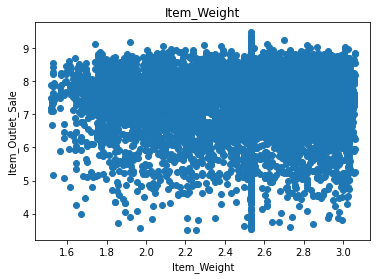

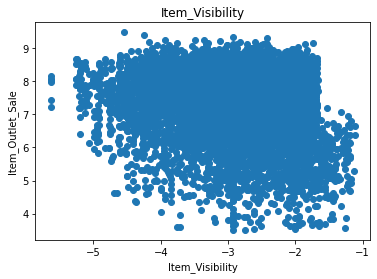

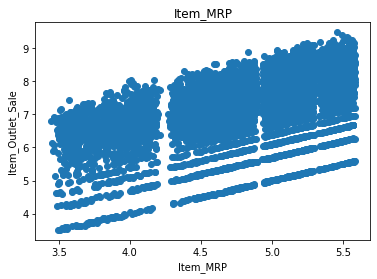

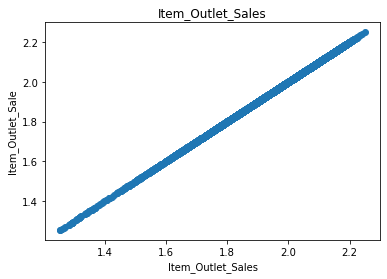

In [93]:
#Lograthmic tranformation
for feature in numerical_features:
  trainset=train.copy()
  if 0 in trainset[feature].unique():
    pass
  else:
    trainset[feature]=np.log(trainset[feature])
    trainset['Item_Outlet_Sales']=np.log(trainset['Item_Outlet_Sales'])

  plt.scatter(trainset[feature],trainset['Item_Outlet_Sales'])
  plt.xlabel(feature)
  plt.ylabel('Item_Outlet_Sale')
  plt.title(feature)
  plt.show()   

In [94]:
log_features=[feature for feature in numerical_features if feature not in ['Item_Identifier']and train[feature].min()!=0]

In [95]:
log_features

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [96]:
for feature in log_features:
  train[feature]=np.log(train[feature])

In [97]:
features_scale=[feature for feature in train.columns if feature not in['Item_Identifier','Item_Outlet_Sales']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[features_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [101]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years active,Item_Type_Combined,Outlet_No,Medium,Small,U,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Non-Edible,Regular
0,FDA15,2.230014,-4.132215,5.520697,8.225540,14,1,049,1,0,0,0,0,1,0,0,0,0
1,DRC01,1.778336,-3.948780,3.876794,6.094524,4,0,018,1,0,0,0,1,0,1,0,0,1
2,FDN15,2.862201,-4.088756,4.953133,7.648392,14,1,049,1,0,0,0,0,1,0,0,0,0
3,FDX07,2.954910,-2.920051,5.204529,6.596300,15,1,010,0,0,1,0,1,0,0,0,0,1
4,NCD19,2.189416,-2.920051,3.986414,6.902446,26,2,013,0,0,0,0,1,1,0,0,1,0


In [99]:
train_final=pd.concat([train[['Item_Identifier','Item_Outlet_Sales']].reset_index(drop=True),
                       pd.DataFrame(scaler.transform(train[features_scale]),columns=features_scale)],axis=1)

In [103]:
train_final.head()

,Item_Identifier,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Years active,Item_Type_Combined,Outlet_No,Medium,Small,U,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Non-Edible,Regular
0,FDA15,8.225540,0.462051,0.332202,0.969148,0.416667,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,DRC01,6.094524,0.169670,0.372782,0.202234,0.000000,0.0,0.205128,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,FDN15,7.648392,0.871279,0.341816,0.704368,0.416667,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,FDX07,6.596300,0.931292,0.600360,0.821649,0.458333,0.5,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,NCD19,6.902446,0.435771,0.600360,0.253374,0.916667,1.0,0.076923,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
